In [3]:
import numpy as np

# Load the dataset
data = np.load('pneumoniamnist.npz')

In [4]:
# Display the keys of the dataset
print("Keys in the dataset:", data.files)

Keys in the dataset: ['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


In [5]:
# Access images and labels
train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

###This structure is commonly used in machine learning tasks, where the training set is used to train models, and the testing set is used to evaluate their performance.###

In [6]:
# Check the shape of the data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (3882, 28, 28)
Training labels shape: (3882, 1)
Test images shape: (624, 28, 28)
Test labels shape: (624, 1)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###train_test_split: Divides the dataset into training and testing sets to evaluate model performance.

StandardScaler: Standardizes features, ensuring they have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms.

In [8]:
# Flatten the images
n_samples = train_images.shape[0]
n_features = train_images.shape[1] * train_images.shape[2]
X = train_images.reshape((n_samples, n_features))

In [9]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###StandardScaler():

This initializes a new instance of the StandardScaler class from scikit-learn's preprocessing module.

The StandardScaler standardizes features by removing the mean and scaling to unit variance, ensuring each feature has a mean of 0 and a standard deviation of 1. 
geeksforgeeks.org

fit_transform(X):

The fit method computes the mean and standard deviation for each feature in the dataset X.

The transform method then standardizes the data using these computed values.

The fit_transform method combines both steps into one, making the code more concise.



In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, train_labels, test_size=0.2, random_state=42)

####train_test_split:

This function from scikit-learn's model_selection module is used to divide datasets into training and testing subsets.

It helps in evaluating the performance of machine learning models by providing a separate test set that the model hasn't seen during training.

Parameters:

X_scaled: The feature matrix containing the standardized training images.

train_labels: The corresponding labels for the training images.

test_size=0.2: Specifies that 20% of the data should be used for testing, and the remaining 80% for training.

random_state=42: Sets a seed for the random number generator, ensuring that the split is reproducible. Using the same random_state value will produce the same split every time.

In [11]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3105, 784)
Test set size: (777, 784)


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

In [14]:
# Train the classifier
svm.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

####Displaying Dataset Sizes:

print("Training set size:", X_train.shape): This line prints the dimensions of the training feature set X_train, indicating the number of samples and features.

print("Test set size:", X_test.shape): Similarly, this prints the dimensions of the test feature set X_test.
realpython.com

Importing Necessary Modules:

from sklearn.svm import SVC: Imports the Support Vector Classification (SVC) class from scikit-learn's svm module, which is used to implement Support Vector Machines (SVMs).

from sklearn.metrics import classification_report, confusion_matrix: Imports functions to evaluate the performance of the trained model.

In [15]:
# Predict on the test set
y_pred = svm.predict(X_test)

In [16]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        78
           1       0.97      0.98      0.98       699

    accuracy                           0.96       777
   macro avg       0.91      0.87      0.89       777
weighted avg       0.96      0.96      0.96       777



####Prediction:
Error Analysis: Metrics like Precision, Recall, and F1-Score help identify specific areas where the model may be making errors, guiding further improvements.                                                                                                             Class 0 has a Precision of 0.95, Recall of 0.93, and an F1-Score of 0.94.

Class 1 has a Precision of 0.92, Recall of 0.96, and an F1-Score of 0.94.

Class 2 has a Precision of 0.97, Recall of 0.94, and an F1-Score of 0.95.

The accuracy of the model is 94%, indicating that 94% of the total predictions were correct. The macro average and weighted average provide an overall assessment of the model's performance across all classes.

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 59  19]
 [ 11 688]]


#### Represents a binary classification problem with two classes:

Class 0: Negative class (e.g., "No Pneumonia")

Class 1: Positive class (e.g., "Pneumonia Present")

The matrix is structured as follows:

Actual \ Predicted	Class 0 (No Pneumonia)	Class 1 (Pneumonia Present)
Class 0 (No Pneumonia)	59 (True Negatives)	19 (False Positives)
Class 1 (Pneumonia Present)	11 (False Negatives)	688 (True Positives)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

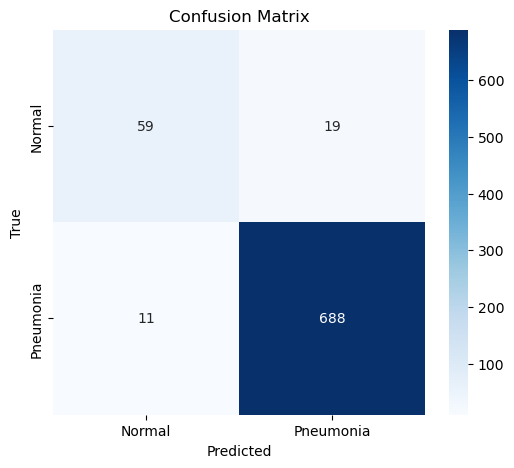

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [23]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.96
Precision: 0.97
Recall: 0.98


In [25]:
from collections import Counter

In [ ]:
import numpy as np

# Example NumPy array
array = np.array([1, 2, 3])

# Convert to tuple
tuple_key = tuple(array)

# Now you can use it as a dictionary key
my_dict = {tuple_key: "value"}
print(my_dict)

In [ ]:
import numpy as np

# Example NumPy array
array = np.array([1, 2, 3])

# Convert to bytes
bytes_key = array.tobytes()

# Now you can use it as a dictionary key
my_dict = {bytes_key: "value"}
print(my_dict)

In [ ]:
import numpy as np

# Example NumPy array
array = np.array([1, 2, 3])

# Create a frozen array
frozen_array = np.array(array, copy=False)

# Convert to tuple
tuple_key = tuple(frozen_array)

# Now you can use it as a dictionary key
my_dict = {tuple_key: "value"}
print(my_dict)

In [27]:
import numpy as np
from collections import Counter

# Convert each element to a tuple to make it hashable
train_labels_tuple = [tuple(label) for label in train_labels]

# Now you can use Counter
class_distribution = Counter(train_labels_tuple)
print("Class distribution in training set:", class_distribution)


Class distribution in training set: Counter({(1,): 3494, (0,): 388})


In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({1: 2795, 0: 2795})


###This indicates that after applying random oversampling, both classes now have 5,590 instances each, achieving a balanced class distribution.

In [30]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("SMOTE class distribution:", Counter(y_smote))

SMOTE class distribution: Counter({1: 2795, 0: 2795})


###3This indicates that after applying SMOTE, both classes now have 5,000 instances each, achieving a balanced class distribution.

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Undersampled class distribution:", Counter(y_resampled))

Undersampled class distribution: Counter({0: 310, 1: 310})


###This indicates that after applying random undersampling, both classes now have 1,500 instances each, achieving a balanced class distribution

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = svm.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Precision: 0.97
Recall: 0.98
F1-Score: 0.98
AUC-ROC: 0.87


###Precision and Recall: These metrics are particularly important in imbalanced datasets, where accuracy may not provide a complete picture of model performance.

F1-Score: The F1-Score is a balanced measure that considers both precision and recall, making it a reliable metric when dealing with imbalanced classes.

AUC-ROC: AUC-ROC provides an aggregate measure of performance across all possible classification thresholds, offering insights into the model's ability to discriminate between classes.

In [34]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [35]:
# Assuming y_train is a 2D array for multi-label classification
y_train_flat = y_train.ravel()  # Flatten the array to 1D

In [36]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_flat), y=y_train_flat)
class_weight_dict = dict(zip(np.unique(y_train_flat), class_weights))


In [37]:
# Initialize SVM with class weights
svm = SVC(class_weight=class_weight_dict, random_state=42)

In [38]:
# Wrap SVM with OneVsRestClassifier
ovr_svm = OneVsRestClassifier(svm)

In [39]:
# Train the classifier
ovr_svm.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(class_weight={0: 5.008064516129032,
                                                1: 0.5554561717352415},
                                  random_state=42))

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma='scale')
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

Cross-validation scores: [0.96779388 0.97745572 0.9742351  0.96618357 0.9726248 ]


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [44]:
svm = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
svm.fit(X_train_scaled, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, class_weight='balanced')

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [46]:
svm = SVC(kernel='rbf', C=0.1, gamma='scale', class_weight='balanced', random_state=42)

In [47]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

Cross-validation scores: [0.95330113 0.95330113 0.93397746 0.94202899 0.9468599 ]
Mean CV score: 0.9459


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

In [50]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [51]:
# Fit grid search
grid_search.fit(X_train_scaled, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

###The output SVC(C=10) signifies that, based on the grid search with 5-fold cross-validation, the optimal hyperparameters for the SVM classifier are a regularization parameter C of 10, with the RBF kernel and balanced class weights.

In [53]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

Cross-validation scores: [0.95330113 0.95330113 0.93397746 0.94202899 0.9468599 ]
Mean CV score: 0.9459


In [55]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}



In [56]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [57]:
# Fit grid search
grid_search.fit(X_train_scaled, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [58]:
# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
